In [1]:
from pandas import read_csv
from datetime import datetime


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import pandas as pd
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [2]:
data=pd.read_excel('US Data.xlsx')
data.head()

,Date,Open Price,Last Price,Financial Leverage,Volume,PE RATIO,Cash Flow Per Share,Price to Book Ratio,Dividend Per Share,SPX,VIX,PPUT
0,2014-02-03,71.8014,71.6471,1.7067,100620772,12.4425,3.6142,3.4514,0.4357,1741.89,21.44,593.43
1,2014-02-04,72.2643,72.6843,1.7067,94273543,12.6226,3.6142,3.5013,0.4357,1755.20,19.11,594.46
2,2014-02-05,72.3657,73.2271,1.7067,82322156,12.7169,3.6142,3.5275,0.4357,1751.64,19.95,594.10
3,2014-02-06,72.8657,73.2157,1.7067,64497223,12.7149,3.6142,3.5269,0.4357,1773.43,17.23,597.95
4,2014-02-07,74.4829,74.2400,1.7067,93638601,12.8928,3.6142,3.5763,0.4357,1797.02,15.29,603.01


In [3]:
google =pd.read_excel('US Data.xlsx', sheet_name = 'Google')

In [4]:
google.head()

,GOOGLE,Open Price,Last Price,Financial Leverage,Volume,PE RATIO,Cash Flow Per Share,Price to Book Ratio,Dividend Per Share
0,2014-02-03,590.171,567.264,1.2683,4575602,28.6937,7.8217,4.3639,0
1,2014-02-04,569.546,569.631,1.2683,2815737,28.8135,7.8217,4.3822,0
2,2014-02-05,572.244,572.154,1.2683,2400619,28.9411,7.8217,4.4016,0
3,2014-02-06,576.123,580.542,1.2683,1948254,29.3654,7.8217,4.4661,0
4,2014-02-07,584.381,589.290,1.2683,2687308,29.8079,7.8217,4.5334,0


In [5]:
google['Google'] = 1

In [6]:
data['Google'] = 0

In [7]:
google.head()

,GOOGLE,Open Price,Last Price,Financial Leverage,Volume,PE RATIO,Cash Flow Per Share,Price to Book Ratio,Dividend Per Share,Google
0,2014-02-03,590.171,567.264,1.2683,4575602,28.6937,7.8217,4.3639,0,1
1,2014-02-04,569.546,569.631,1.2683,2815737,28.8135,7.8217,4.3822,0,1
2,2014-02-05,572.244,572.154,1.2683,2400619,28.9411,7.8217,4.4016,0,1
3,2014-02-06,576.123,580.542,1.2683,1948254,29.3654,7.8217,4.4661,0,1
4,2014-02-07,584.381,589.290,1.2683,2687308,29.8079,7.8217,4.5334,0,1


In [8]:
data.head()

,Date,Open Price,Last Price,Financial Leverage,Volume,PE RATIO,Cash Flow Per Share,Price to Book Ratio,Dividend Per Share,SPX,VIX,PPUT,Google
0,2014-02-03,71.8014,71.6471,1.7067,100620772,12.4425,3.6142,3.4514,0.4357,1741.89,21.44,593.43,0
1,2014-02-04,72.2643,72.6843,1.7067,94273543,12.6226,3.6142,3.5013,0.4357,1755.20,19.11,594.46,0
2,2014-02-05,72.3657,73.2271,1.7067,82322156,12.7169,3.6142,3.5275,0.4357,1751.64,19.95,594.10,0
3,2014-02-06,72.8657,73.2157,1.7067,64497223,12.7149,3.6142,3.5269,0.4357,1773.43,17.23,597.95,0
4,2014-02-07,74.4829,74.2400,1.7067,93638601,12.8928,3.6142,3.5763,0.4357,1797.02,15.29,603.01,0


In [10]:
google.columns = ['Date', 'Open Price', 'Last Price', 'Financial Leverage', 'Volume',
       'PE RATIO', 'Cash Flow Per Share', 'Price to Book Ratio',
       'Dividend Per Share', 'Google']

In [11]:
google.shape, data.shape

((1423, 10), (1380, 13))

In [12]:
df = pd.concat([data, google])
df.shape

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(2803, 13)

In [14]:
df['Google'].value_counts()

1    1423
0    1380
Name: Google, dtype: int64

In [15]:
df.tail()

,Cash Flow Per Share,Date,Dividend Per Share,Financial Leverage,Google,Last Price,Open Price,PE RATIO,PPUT,Price to Book Ratio,SPX,VIX,Volume
1418,18.1953,2019-09-20,0.0,1.3375,1,1229.84,1233.64,27.9353,NaN,4.4412,NaN,NaN,1937743
1419,18.1953,2019-09-23,0.0,1.3375,1,1234.69,1226.57,28.0455,NaN,4.4588,NaN,NaN,1197069
1420,18.1953,2019-09-24,0.0,1.3375,1,1218.33,1240.00,27.6739,NaN,4.3997,NaN,NaN,1835712
1421,18.1953,2019-09-25,0.0,1.3375,1,1245.94,1216.01,28.3010,NaN,4.4994,NaN,NaN,1355162
1422,18.1953,2019-09-26,0.0,1.3375,1,1242.29,1242.14,28.2181,NaN,4.4862,NaN,NaN,1171577


In [16]:
import numpy as np

In [20]:
data.head()

,Date,Open Price,Last Price,Financial Leverage,Volume,PE RATIO,Cash Flow Per Share,Price to Book Ratio,Dividend Per Share,SPX,VIX,PPUT,Google
0,2014-02-03,71.8014,71.6471,1.7067,100620772,12.4425,3.6142,3.4514,0.4357,1741.89,21.44,593.43,0
1,2014-02-04,72.2643,72.6843,1.7067,94273543,12.6226,3.6142,3.5013,0.4357,1755.20,19.11,594.46,0
2,2014-02-05,72.3657,73.2271,1.7067,82322156,12.7169,3.6142,3.5275,0.4357,1751.64,19.95,594.10,0
3,2014-02-06,72.8657,73.2157,1.7067,64497223,12.7149,3.6142,3.5269,0.4357,1773.43,17.23,597.95,0
4,2014-02-07,74.4829,74.2400,1.7067,93638601,12.8928,3.6142,3.5763,0.4357,1797.02,15.29,603.01,0


In [22]:
data.tail()

,Date,Open Price,Last Price,Financial Leverage,Volume,PE RATIO,Cash Flow Per Share,Price to Book Ratio,Dividend Per Share,SPX,VIX,PPUT,Google
1375,2019-07-22,203.65,207.22,3.2832,22277932,17.6451,2.5458,9.7350,0.77,2985.03,13.53,947.86,0
1376,2019-07-23,208.46,208.84,3.2832,18355210,17.7831,2.5458,9.8111,0.77,3005.47,12.61,953.53,0
1377,2019-07-24,207.67,208.67,3.2832,14991567,17.7686,2.5458,9.8031,0.77,3019.56,12.07,957.62,0
1378,2019-07-25,208.89,207.02,3.2832,13909562,17.6281,2.5458,9.7256,0.77,3003.67,12.74,952.86,0
1379,2019-07-26,207.48,207.74,3.2832,17618874,17.6894,2.5458,9.7594,0.77,3025.86,12.16,959.41,0


In [23]:
google.head()

,Date,Open Price,Last Price,Financial Leverage,Volume,PE RATIO,Cash Flow Per Share,Price to Book Ratio,Dividend Per Share,Google
0,2014-02-03,590.171,567.264,1.2683,4575602,28.6937,7.8217,4.3639,0,1
1,2014-02-04,569.546,569.631,1.2683,2815737,28.8135,7.8217,4.3822,0,1
2,2014-02-05,572.244,572.154,1.2683,2400619,28.9411,7.8217,4.4016,0,1
3,2014-02-06,576.123,580.542,1.2683,1948254,29.3654,7.8217,4.4661,0,1
4,2014-02-07,584.381,589.290,1.2683,2687308,29.8079,7.8217,4.5334,0,1


In [24]:
google.tail()

,Date,Open Price,Last Price,Financial Leverage,Volume,PE RATIO,Cash Flow Per Share,Price to Book Ratio,Dividend Per Share,Google
1418,2019-09-20,1233.64,1229.84,1.3375,1937743,27.9353,18.1953,4.4412,0,1
1419,2019-09-23,1226.57,1234.69,1.3375,1197069,28.0455,18.1953,4.4588,0,1
1420,2019-09-24,1240.00,1218.33,1.3375,1835712,27.6739,18.1953,4.3997,0,1
1421,2019-09-25,1216.01,1245.94,1.3375,1355162,28.3010,18.1953,4.4994,0,1
1422,2019-09-26,1242.14,1242.29,1.3375,1171577,28.2181,18.1953,4.4862,0,1


In [25]:
google.set_index('Date', inplace = True)
data.set_index('Date', inplace = True)

In [33]:
%%time
my_list = []
for x in data.index:
    company = np.random.choice(['apple', 'google'])
    if company == 'apple':
        my_list.append(data.loc[x])
    else:
        my_list.append(google.loc[x])
    

CPU times: user 371 ms, sys: 6.59 ms, total: 378 ms
Wall time: 380 ms


In [32]:
pd.DataFrame(my_list)

,Open Price,Last Price,Financial Leverage,Volume,PE RATIO,Cash Flow Per Share,Price to Book Ratio,Dividend Per Share,SPX,VIX,PPUT,Google
2014-02-03,71.8014,71.6471,1.7067,100620772.0,12.4425,3.6142,3.4514,0.4357,1741.89,21.44,593.43,0.0
2014-02-04,72.2643,72.6843,1.7067,94273543.0,12.6226,3.6142,3.5013,0.4357,1755.20,19.11,594.46,0.0
2014-02-05,72.3657,73.2271,1.7067,82322156.0,12.7169,3.6142,3.5275,0.4357,1751.64,19.95,594.10,0.0
2014-02-06,72.8657,73.2157,1.7067,64497223.0,12.7149,3.6142,3.5269,0.4357,1773.43,17.23,597.95,0.0
2014-02-07,74.4829,74.2400,1.7067,93638601.0,12.8928,3.6142,3.5763,0.4357,1797.02,15.29,603.01,0.0
2014-02-10,586.4680,587.0330,1.2683,1945639.0,29.6937,7.8217,4.5160,0.0000,NaN,NaN,NaN,1.0
2014-02-11,75.8014,76.5657,1.7067,70672252.0,13.2967,3.6142,3.6883,0.4357,1819.75,14.51,609.32,0.0
2014-02-12,76.7071,76.5600,1.7067,77127064.0,13.2957,3.6142,3.6880,0.4357,1819.26,14.30,609.34,0.0
2014-02-13,590.9470,600.5310,1.2683,1836921.0,30.3765,7.8217,4.6199,0.0000,NaN,NaN,NaN,1.0
2014-02-14,77.4957,77.7129,1.7067,68468036.0,13.4959,3.6142,3.7436,0.4357,1838.63,13.57,615.61,0.0


In [21]:
np.random.choice(['apple', 'google'])

'apple'

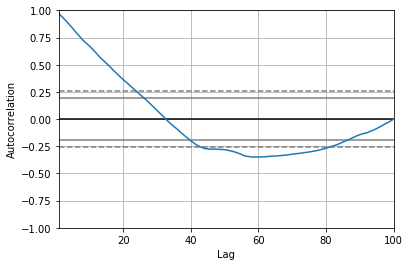

In [23]:
ts=data[['Date','Last Price']]
ts.set_index('Date', inplace=True)
autocorrelation_plot(ts.head(100))
pyplot.show()


In [24]:
ts.head()

,Last Price
Date,
2014-02-03,71.6471
2014-02-04,72.6843
2014-02-05,73.2271
2014-02-06,73.2157
2014-02-07,74.2400


In [25]:
#Intuitively, we know it is a non-stationary series, but let's have a ADfuller test anyway to verify.
#Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts['Last Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -0.910913
p-value: 0.784358


In [26]:

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
 
    best_score, best_cfg = float("inf"), None
    for p in p_values:

        for d in d_values:
           
            for q in q_values:
       
                order = (p,d,q)
                print('order: ', order)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                        print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [27]:
def evaluate_arima_model(ts, order):

    X = ts['Last Price'].values
    size = int(len(X) * 0.8)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    return error

In [8]:
%%time
from warnings import filterwarnings
filterwarnings('ignore')

# evaluate parameters
p_values = [1, 2,3]
d_values = [1, 2]
q_values = [2,3,4]

evaluate_models(ts, p_values, d_values, q_values)



order:  (1, 1, 2)
order:  (1, 1, 3)
order:  (1, 1, 4)
order:  (1, 2, 2)
order:  (1, 2, 3)
order:  (1, 2, 4)
ARIMA(1, 2, 4) MSE=12.850
ARIMA(1, 2, 4) MSE=12.850
order:  (2, 1, 2)
order:  (2, 1, 3)
order:  (2, 1, 4)
order:  (2, 2, 2)
order:  (2, 2, 3)
order:  (2, 2, 4)
ARIMA(2, 2, 4) MSE=13.002
order:  (3, 1, 2)
ARIMA(3, 1, 2) MSE=13.027
order:  (3, 1, 3)
order:  (3, 1, 4)
order:  (3, 2, 2)
ARIMA(3, 2, 2) MSE=12.773
ARIMA(3, 2, 2) MSE=12.773
order:  (3, 2, 3)
ARIMA(3, 2, 3) MSE=12.782
order:  (3, 2, 4)
ARIMA(3, 2, 4) MSE=12.937
Best ARIMA(3, 2, 2) MSE=12.773
CPU times: user 2h 8min 51s, sys: 56.4 s, total: 2h 9min 48s
Wall time: 1h 35min 37s


In [10]:
X = ts['Last Price'].values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1103
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2183.259
Method:                       css-mle   S.D. of innovations              1.751
Date:                Thu, 17 Oct 2019   AIC                           4378.518
Time:                        12:35:22   BIC                           4408.552
Sample:                             1   HQIC                          4389.879
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1035      0.041      2.501      0.013       0.022       0.185
ar.L1.D.y      0.8038      0.460      1.746      0.081      -0.099       1.706
ar.L2.D.y      0.1402      0.443      0.316      0.7

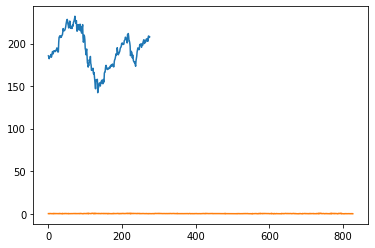

In [13]:
model=ARIMA(train, order=(2,1,2))
m_fit=model.fit()
print(m_fit.summary())
forecast=m_fit.predict(len(test))
pyplot.plot(test, label='Test')
pyplot.plot(forecast, label='Prediction')
pyplot.show()

In [28]:
evaluate_arima_model(data, (3, 2, 4))

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


KeyboardInterrupt: 

In [30]:
model=ARIMA(train_data.values, order=(2,1,2))
m_fit=model.fit()
print(m_fit.summary())
forecast=m_fit.predict(len(test_data))
pyplot.plot(test_data, label='Test')
pyplot.plot(forecast, label='Prediction')
pyplot.show()

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [6]:
import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    print(f'Missed: {order}')
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', 
                  header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=52425.268
ARIMA(0, 0, 1) MSE=38145.111
ARIMA(0, 0, 2) MSE=23989.567
ARIMA(0, 1, 0) MSE=18003.173
ARIMA(0, 1, 1) MSE=9558.332
Missed: (0, 1, 2)
ARIMA(0, 2, 0) MSE=67339.808
ARIMA(0, 2, 1) MSE=18322.383
Missed: (0, 2, 2)
ARIMA(1, 0, 0) MSE=23112.939
Missed: (1, 0, 1)
Missed: (1, 0, 2)
ARIMA(1, 1, 0) MSE=7121.369
ARIMA(1, 1, 1) MSE=7003.685
Missed: (1, 1, 2)
ARIMA(1, 2, 0) MSE=18608.009
Missed: (1, 2, 1)
Missed: (1, 2, 2)
ARIMA(2, 0, 0) MSE=10267.399
Missed: (2, 0, 1)
Missed: (2, 0, 2)
ARIMA(2, 1, 0) MSE=5689.930
ARIMA(2, 1, 1) MSE=7759.706
Missed: (2, 1, 2)
ARIMA(2, 2, 0) MSE=9860.942
Missed: (2, 2, 1)
Missed: (2, 2, 2)
ARIMA(4, 0, 0) MSE=7249.595
Missed: (4, 0, 1)
Missed: (4, 0, 2)
ARIMA(4, 1, 0) MSE=6649.591
ARIMA(4, 1, 1) MSE=6796.255
Missed: (4, 1, 2)
ARIMA(4, 2, 0) MSE=7596.335
ARIMA(4, 2, 1) MSE=4694.875
Missed: (4, 2, 2)
ARIMA(6, 0, 0) MSE=8350.060
Missed: (6, 0, 1)
Missed: (6, 0, 2)
ARIMA(6, 1, 0) MSE=6810.075
ARIMA(6, 1, 1) MSE=4537.020
Missed: (6, 1, 2)
ARIMA